In [1]:
#import packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import scipy as sp
from matplotlib.colors import ListedColormap
from skimage import io, color
from sklearn import decomposition
import pandas as pd
sym.init_printing(use_unicode=True)

# Exploring PCA 

In [63]:
#define a dummy dataset 
import random as rd
cov_mat = np.array([[8, 3], [3, 2]])
mean = np.array([6,4])
X = np.random.multivariate_normal(mean, cov_mat, size=1000)

In [64]:
X.shape

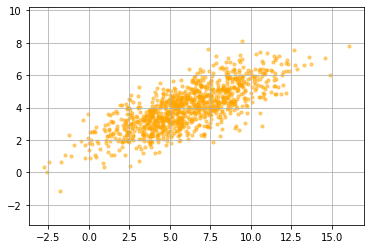

In [67]:
#plot the data
#fig = plt.figure(figsize = (20,10)) #use this line to play around with the size of the graph!
plt.scatter(X[:,0], X[:,1], alpha=0.5, s=10, c='orange')
plt.axis('equal');
plt.grid(True);


The PCA algorithm finds principal components in the direction of maximized variance. The first principal component will be in the direction of the most variance in the data, the second one in the direction of the second most variance and also orthogonal to the first principal component. 

Therefore, looking at the above plot makes it intuitvely clear that the first principal component will be on the diagonal from the bottom left to the top-right.

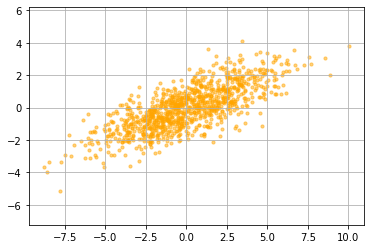

In [68]:
#calculate mean 
x_bar = np.zeros((1,2))

for i in range(1000):
    x_bar += X[i,:]    
    
x_bar = x_bar / 1000

# Z = np.zeros((1000,2))
# # Center the data
# for i in range(1000):
#     Z[i,:] = X[i,:] - x_bar
    
temp = np.ones((1000,1))
bar = temp @ x_bar
Z = X - bar
    
# Plot the centered data
plt.scatter(Z[:,0], Z[:,1], alpha=0.5, s=10, c='orange')
plt.axis('equal');
plt.grid(True);

plt.savefig('centered_data.jpg')

The data is now centered around the origin! 
Each data point can now be treated as a vector. The goal is to find orthogonal directions of maximum variance within the data. 


The covariance matrix encodes the covariance between all pairs of dimensions/features of the data (here xx, xy, yx, and yy). The entries along the diagonal encode the variance of each dimension (x and y)

In [70]:
#the covariance matrix of our mean-centered data 
C = (1/999) * Z.T @ Z
print(C)

[[8.09958764 2.95188467]
 [2.95188467 1.8761426 ]]


Now we can calulate the eigenvectors of the covariance matrix, C. The eigenvectors are the principal components of the data.

C has two orthonormal eigenvectors. These eigenvectors are the principal components of the data set. The squareroot of the eigenvalues indicate the amount of variance in the direction of the eigenvectors. 

[9.27697227 0.69875797]
[[ 0.92884182 -0.37047656]
 [ 0.37047656  0.92884182]]


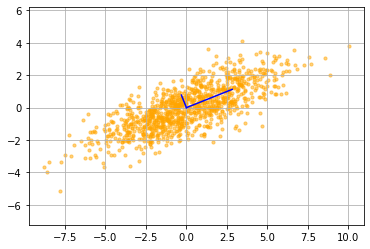

In [71]:
eig_val, eig_vec = np.linalg.eig(C)


order = np.argsort(eig_val)  #gives the indices of the sorted array of the eigenvalues

order = order[::-1] #we want eigenvalues and eigenvectors to be sorted from the largest eigenvalue to the smallest one


eig_val = eig_val[order]   #the eigenvalues sorted in largest to smallest order since the eigenvector explaning the most variance is the first principal component
eig_vec = eig_vec[:,order]  
print(eig_val)
print(eig_vec)

# Make the plot
plt.scatter(Z[:,0], Z[:,1], alpha=0.5, s=10, c = 'orange')
plt.plot([0,np.sqrt(eig_val[0])*eig_vec[0,0]], [0,np.sqrt(eig_val[0])*eig_vec[1,0]], color='blue')
plt.plot([0,np.sqrt(eig_val[1])*eig_vec[0,1]], [0,np.sqrt(eig_val[1])*eig_vec[1,1]], color='blue')
plt.axis('equal');
plt.grid(True);

plt.savefig('data_eigen_vec.jpg')

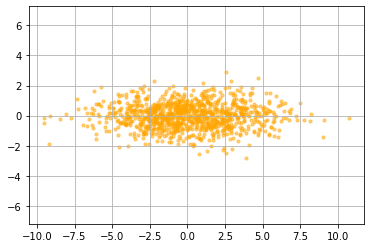

In [72]:
#apply the PCA transformation to the mean centered data
Z_pca = Z @ eig_vec

plt.scatter(Z_pca[:,0], Z_pca[:,1], alpha=0.5, s=10, c='orange')
plt.axis('equal');
plt.grid(True);

plt.savefig('data_pca.jpg')

The data is now aligned along the principal components (the directions along the maximum variance)

Another way to calculate Principal components is using Singular Value Decomposition

In [73]:
U, s, Vt = np.linalg.svd(Z)

#the rows of Vt are the principal components 
V = Vt.T

print(V)
print(np.allclose(V, eig_vec))





[[ 0.92884182 -0.37047656]
 [ 0.37047656  0.92884182]]
True


# Image Compression using PCA 

### Step 1: Read image into an array

In [24]:
#import image into a numpy array

img = io.imread('dying_star.png')
print(img.shape)  
print(type(img))




(4501, 4833, 3)
<class 'numpy.ndarray'>


The third entry in the img.shape output corresponds to the 3 channels : Red, green and blue corresponding to the RGB values of pixels in the image
The image is read into an array consisting of 3 channels : red, green and blue. Each channel a 4501 X 4833 matrix. 

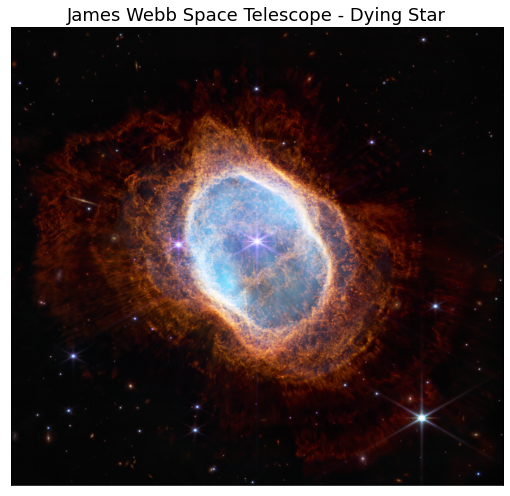

In [25]:
#display/plot the image
fig = plt.figure(figsize = (30,30))
ax1 = fig.add_subplot(1,3,1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('James Webb Space Telescope - Dying Star', fontsize=18)
plt.imshow(img.astype('uint8'))

Each channel is going to be processed seperately. We can then stack them back to give us an RGB image after processing.

In [26]:
#split the original image into Red, Green and Blue matrices 
img_r = np.matrix(img[:,:,0])
img_g = np.matrix(img[:,:,1])
img_b = np.matrix(img[:,:,2])

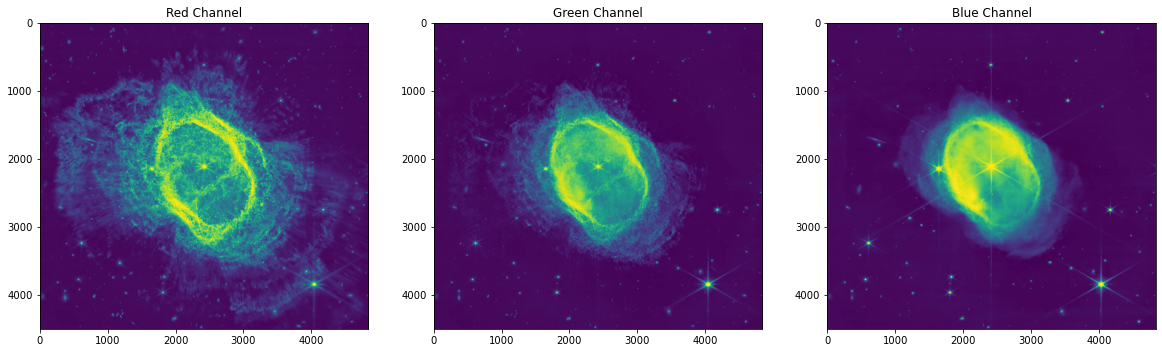

In [27]:
# Plotting the 3 images 
fig = plt.figure(figsize = (20, 20)) 

fig.add_subplot(1,3,1)
plt.title("Red Channel")
plt.imshow(img_r)

fig.add_subplot(1,3,2)
plt.title("Green Channel")
plt.imshow(img_g)

fig.add_subplot(1,3,3)
plt.title("Blue Channel")
plt.imshow(img_b)
plt.show()

Note how the different Channel images highlight different features from the original image.

To get a sense of what these matrices look like, we can import the matrix into a pandas datafram. We could print the matrix by itself, however it will be uglier to look at and harder to understand since it is a big matrix

In [75]:
red_mat = pd.DataFrame(data = img_r)
red_mat



,0,1,2,3,4,5,6,7,8,9,...,4823,4824,4825,4826,4827,4828,4829,4830,4831,4832
0,11,10,8,7,6,6,5,8,15,16,...,6,5,5,5,8,9,11,11,10,11
1,10,10,7,5,6,8,8,9,14,14,...,4,6,7,8,8,9,9,10,9,11
2,6,9,9,9,9,15,10,7,11,14,...,7,9,9,8,8,7,7,8,9,9
3,6,12,12,12,8,14,9,6,10,12,...,9,9,9,9,7,7,6,7,7,8
4,4,4,5,6,6,6,6,6,6,8,...,8,7,8,8,7,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,7,7,6,6,6,6,7,7,7,7,...,1,0,0,2,3,4,3,0,0,0
4497,8,7,7,6,6,6,7,7,7,7,...,1,0,0,0,2,4,3,1,0,0
4498,8,7,7,7,6,6,7,7,7,7,...,1,1,1,0,2,4,4,2,1,0
4499,8,8,8,7,6,7,7,6,7,6,...,2,3,4,3,3,5,5,4,4,1


### Step 2: Mean-center the data by subtracting the mean from the data

In [29]:
#find the mean (row) of red matix 
dim = (1,4833) 
r_bar = np.zeros(dim)
for i in range(4501):
    r_bar += img_r[i,:]
    
r_bar /= 4501

#find the mean (row) of green matrix
g_bar = np.zeros(dim)
for i in range(4501):
    g_bar += img_g[i,:]
    
g_bar /= 4501

#find the mean (row) of blue matrix
b_bar = np.zeros(dim)
for i in range(4501):
    b_bar += img_b[i,:]
    
b_bar /= 4501



Now we subtract the mean from the original img_r, img_g, img_b matrices to Mean-center the data. The resulting Zr, Zg, Zb matrices will have the same dimensions as their original counterparts. 

In [30]:
z_dim = (4501,4833)  
Zr = np.zeros(z_dim)
for i in range(z_dim[0]):
    Zr[i,:] = img_r[i,:] - r_bar
    
    
Zg = np.zeros(z_dim)
for i in range(z_dim[0]):
    Zg[i,:] = img_g[i,:] - g_bar
      
Zb = np.zeros(z_dim)
for i in range(z_dim[0]):
    Zb[i,:] = img_b[i,:] - b_bar

Singular Value Decomposition of the centered matrices using Numpy

In [31]:
#This will take a while to run

Ur, sr, Vtr = np.linalg.svd(Zr)
Ug, sg, Vtg = np.linalg.svd(Zg)
Ub, sb, Vtb = np.linalg.svd(Zb)



The rows of Vtr, Vtg, Vtb are the principal components of the respective data sets. They are ordered in terms of decreasing variance. Therefore, the first principal component can be thought of as explaning the most about the dataset, since it is in the direction of the most variance. This is based on the idea that higher variance in the data means interesting insights/signals

In [32]:
print(Vtr.shape)
print(Vtg.shape)
print(Vtb.shape)

(4833, 4833)
(4833, 4833)
(4833, 4833)


The next step is to pick the number of principal components we want to retain. To do this, we can use singular values. Singular values (rescaled by $1/\sqrt{n-1})$ where n is the number of measurements (the rows in our matrix) measure the variance of the data along its corresponding principal component. The larger the singular value, the more of the data the principal component describes. Principal components with small singular values are dropped and will result in small reconstruction (ideally insignificant) errors the original image. 
Performing PCA with sklearn's module is advantageous here since sklearn has pre-built methods to figure out the variance captured by each principal component. 


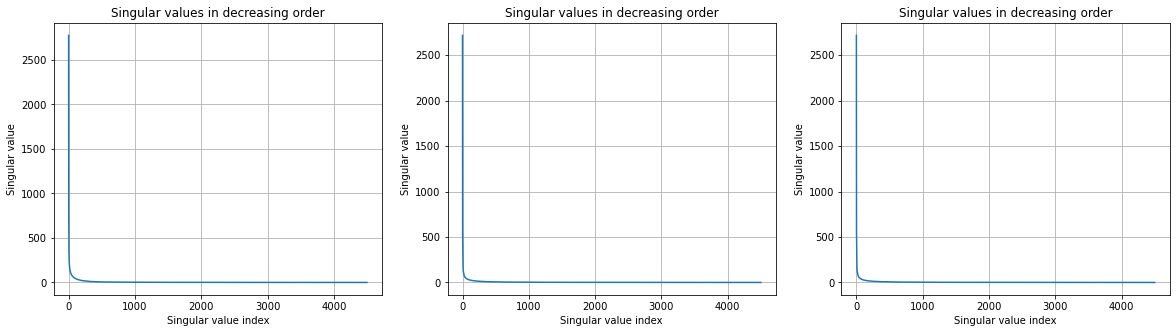

In [76]:
#n over here is 4501

# Plotting the 
fig = plt.figure(figsize = (20, 5)) 

fig.add_subplot(1,3,1)
plt.grid(True)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.title('Singular values in decreasing order');
plt.plot(sr/np.sqrt(4500))

fig.add_subplot(1,3,2)
plt.grid(True)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.title('Singular values in decreasing order');
plt.plot(sg/np.sqrt(4500))


fig.add_subplot(1,3,3)
plt.grid(True)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.title('Singular values in decreasing order');
plt.plot(sg/np.sqrt(4500))


Another way to get a sense of the variance captured by k principal components is to (the total number of Principal components being N):
\begin{equation*}
\frac {\sum_{i=1}^k s_i } {\sum_{i=1}^N s_i}
\end{equation*}



In [53]:
print(sum(sr[:400])/sum(sr[:]))

0.8092272105349703


Here we are only keeping 400 principal components which captures about 80% of the original data

In [54]:
Vr = Vtr.T[:,:400]
Vg = Vtg.T[:,:400]
Vb = Vtb.T[:,:400]

In [55]:
compr = Zr @ Vr
compg = Zg @ Vg
compb = Zb @ Vb

We can now uncompress the image to see how well the compression worked! The goal is to get as close to the original image as possible despite just storing significantly less information. The number of principal components can be changed in the cells above to play around with the quality of the fial uncompressed image

In [56]:
zprojr = compr @ Vr.T
zprojg = compg @ Vg.T
zprojb = compb @ Vb.T

In [57]:
xprojr = np.zeros(np.shape(zprojr))
for i in range(4501):
    xprojr[i,:] = zprojr[i,:] + r_bar
    
xprojg = np.zeros(np.shape(zprojr))
for i in range(4501):
    xprojg[i,:] = zprojg[i,:] + g_bar
    
    
xprojb = np.zeros(np.shape(zprojr))
for i in range(4501):
    xprojb[i,:] = zprojb[i,:] + b_bar

In [58]:
xprojb.shape


In [59]:
rgb = (np.dstack((xprojr,xprojg,xprojb)))  
rgb.shape

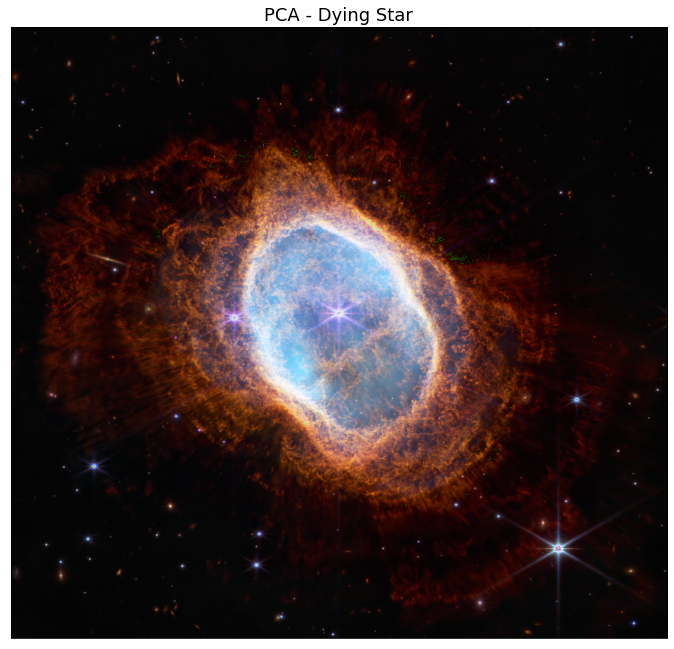

In [80]:
fig = plt.figure(figsize = (40,40))
ax1 = fig.add_subplot(1,3,1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('PCA - Dying Star', fontsize=18)
plt.imshow(rgb.astype('uint8'))


This is pretty decent considering we saved about 8% of the original data!


So in keeping just 8% of the original data, we were able to capture 80% of the information

In [62]:
400/4501